In [ ]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output
import time

class ShadowMazeEnv(gym.Env):
    def __init__(self):
        super(ShadowMazeEnv, self).__init__()
        self.grid_size = 6
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=0, high=self.grid_size-1, shape=(2,), dtype=np.int32)

        self.agent_pos = [0, 0]
        self.goal_pos = [5, 5]
        self.enemies = [[2, 2], [3, 4]]
        self.stealth_zones = [[1, 1], [4, 2]]

    def reset(self):
        self.agent_pos = [0, 0]
        return np.array(self.agent_pos)

    def step(self, action):
        if action == 0 and self.agent_pos[0] > 0: self.agent_pos[0] -= 1
        elif action == 1 and self.agent_pos[0] < self.grid_size - 1: self.agent_pos[0] += 1
        elif action == 2 and self.agent_pos[1] > 0: self.agent_pos[1] -= 1
        elif action == 3 and self.agent_pos[1] < self.grid_size - 1: self.agent_pos[1] += 1

        reward = -0.1
        done = False
        if self.agent_pos == self.goal_pos:
            reward = 10
            done = True
        elif self.agent_pos in self.enemies:
            reward = -10
            done = True
        elif self.agent_pos in self.stealth_zones:
            reward = 1

        return np.array(self.agent_pos), reward, done, {}

    def render(self):
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.set_xlim(0, self.grid_size)
        ax.set_ylim(0, self.grid_size)

        # Draw grid
        for x in range(self.grid_size):
            for y in range(self.grid_size):
                ax.add_patch(patches.Rectangle((y, self.grid_size - 1 - x), 1, 1, edgecolor='black', facecolor='white'))

        # Draw stealth zones
        for s in self.stealth_zones:
            ax.add_patch(patches.Rectangle((s[1], self.grid_size - 1 - s[0]), 1, 1, facecolor='lightblue'))

        # Draw enemies
        for e in self.enemies:
            ax.add_patch(patches.Rectangle((e[1], self.grid_size - 1 - e[0]), 1, 1, facecolor='red'))

        # Draw goal
        g = self.goal_pos
        ax.add_patch(patches.Rectangle((g[1], self.grid_size - 1 - g[0]), 1, 1, facecolor='green'))

        # Draw agent
        a = self.agent_pos
        ax.add_patch(patches.Circle((a[1] + 0.5, self.grid_size - 1 - a[0] + 0.5), 0.3, color='blue'))

        ax.axis('off')
        plt.show()
        time.sleep(0.5)

# Initialize the environment
env = ShadowMazeEnv()

# Q-table initialization
q_table = np.zeros([env.grid_size, env.grid_size, env.action_space.n])

# Hyperparameters for SARSA
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995  # Decay rate for epsilon
epsilon_min = 0.01  # Minimum exploration rate

episode_rewards = []
all_q_values = []

# Training loop with SARSA
for episode in range(1000):
    state = env.reset()  # Reset the environment
    state = tuple(state)  # Convert to tuple for Q-table access
    done = False
    total_reward = 0

    # Choose initial action based on epsilon-greedy policy
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()  # Explore
    else:
        action = np.argmax(q_table[state[0], state[1], :])  # Exploit

    while not done:
        # Take the action and observe the next state and reward
        next_state, reward, done, _ = env.step(action)
        next_state = tuple(next_state)  # Convert next_state to tuple for Q-table access

        # Choose next action based on epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample()  # Explore
        else:
            next_action = np.argmax(q_table[next_state[0], next_state[1], :])  # Exploit

        # Update Q-table (SARSA update rule)
        q_table[state[0], state[1], action] = q_table[state[0], state[1], action] + alpha * \
            (reward + gamma * q_table[next_state[0], next_state[1], next_action] - q_table[state[0], state[1], action])

        # Update state and action for next step
        state = next_state
        action = next_action  # Update action for next step
        total_reward += reward

    # Decay epsilon (exploration rate)
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    # Track rewards for plotting
    episode_rewards.append(total_reward)

    # Append Q-values to track over time
    all_q_values.append(np.copy(q_table))  # Store the Q-table after each episode

    # Print the episode results
    print(f"Episode {episode + 1} finished. Total Reward: {total_reward:.2f}, Epsilon: {epsilon:.3f}")

Episode 1 finished. Total Reward: -10.70, Epsilon: 0.995
Episode 2 finished. Total Reward: -9.40, Epsilon: 0.990
Episode 3 finished. Total Reward: -8.60, Epsilon: 0.985
Episode 4 finished. Total Reward: -7.30, Epsilon: 0.980
Episode 5 finished. Total Reward: -9.80, Epsilon: 0.975
Episode 6 finished. Total Reward: -10.90, Epsilon: 0.970
Episode 7 finished. Total Reward: -9.80, Epsilon: 0.966
Episode 8 finished. Total Reward: 6.70, Epsilon: 0.961
Episode 9 finished. Total Reward: -9.70, Epsilon: 0.956
Episode 10 finished. Total Reward: -9.40, Epsilon: 0.951
Episode 11 finished. Total Reward: -10.30, Epsilon: 0.946
Episode 12 finished. Total Reward: -18.30, Epsilon: 0.942
Episode 13 finished. Total Reward: -12.10, Epsilon: 0.937
Episode 14 finished. Total Reward: -9.90, Epsilon: 0.932
Episode 15 finished. Total Reward: -8.00, Epsilon: 0.928
Episode 16 finished. Total Reward: -12.30, Epsilon: 0.923
Episode 17 finished. Total Reward: -3.10, Epsilon: 0.918
Episode 18 finished. Total Reward: 

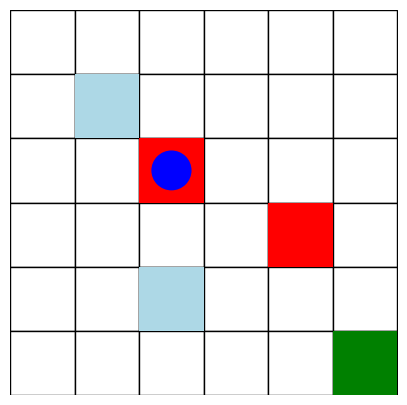

Episode 10 finished. Total Reward: -9.7


In [ ]:
episodes = 10# Number of episodes to run
for episode in range(episodes):
    obs = env.reset()
    done = False
    total_reward = 0
    print(f"Episode {episode + 1}")

    while not done:
        action = env.action_space.sample()  # Random action
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        env.render()

        if done:
            print(f"Episode {episode + 1} finished. Total Reward: {total_reward}")
            break


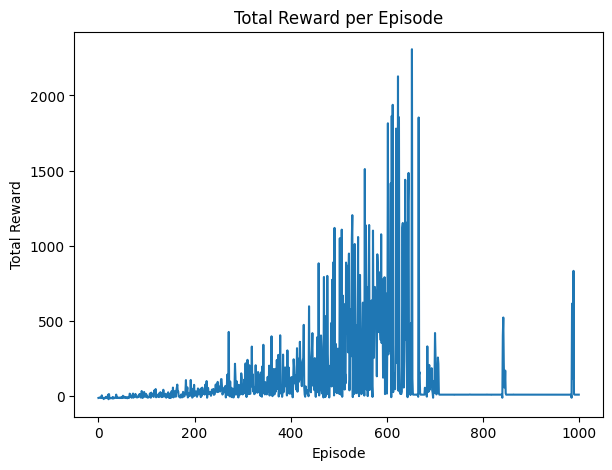

In [ ]:
# After training, plot Q-values and policy iteration (optimal policy)
plt.figure(figsize=(15, 5))

# Plot the average reward per episode
plt.subplot(1, 2, 1)
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

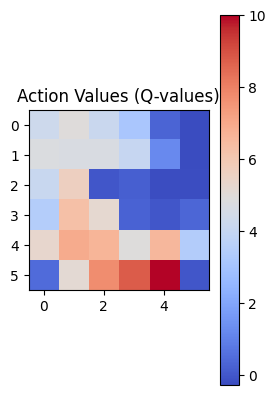

In [ ]:
# Plot the Q-values for the last episode (action values)
plt.subplot(1, 2, 2)
plt.imshow(np.max(q_table, axis=2), cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Action Values (Q-values)')
plt.show()

In [ ]:
# Plot the policy (optimal actions for each state)
policy = np.argmax(q_table, axis=2)  # Optimal policy from the Q-table
print("Optimal Policy (Action with highest Q-value for each state):")
print(policy)

Optimal Policy (Action with highest Q-value for each state):
[[3 1 2 2 2 0]
 [3 1 2 2 2 1]
 [0 1 0 0 0 0]
 [1 1 1 1 0 1]
 [3 3 1 2 1 1]
 [3 3 3 3 3 0]]


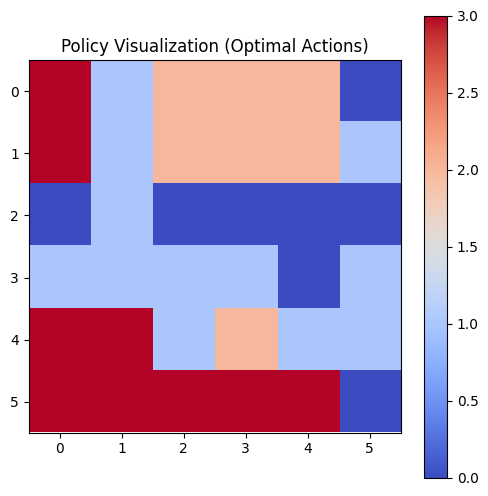

In [ ]:
# Visualize policy in the grid
plt.figure(figsize=(6, 6))
plt.imshow(policy, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Policy Visualization (Optimal Actions)')
plt.show()